In [2]:
!pip install opencv-python

In [3]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from tqdm.notebook import tqdm
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp

In [4]:
class cfg:
    data_dir = './image/train'  
    img_dir = f'{data_dir}/images'
    df_path = f'{data_dir}/train.csv'

In [5]:
num2class = ['incorrect_mask', 'mask1', 'mask2', 'mask3',
             'mask4', 'mask5', 'normal']
class2num = {k: v for v, k in enumerate(num2class)}

In [6]:
df = pd.read_csv(cfg.df_path)

In [6]:
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [7]:
df.tail()

,id,gender,race,age,path
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20
2699,006959,male,Asian,19,006959_male_Asian_19


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [26]:
df['age'].describe()

count    2700.000000
mean       37.708148
std        16.985904
min        18.000000
25%        20.000000
50%        36.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64

In [81]:
df.groupby('gender')['age'].count()

gender
female    1658
male      1042
Name: age, dtype: int64

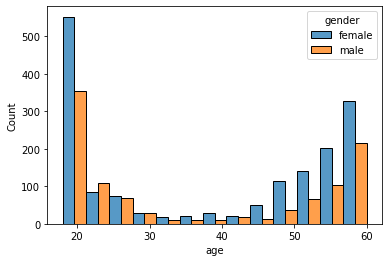

In [43]:
sns.histplot(data=df, x="age", hue="gender", multiple="dodge")
plt.show()

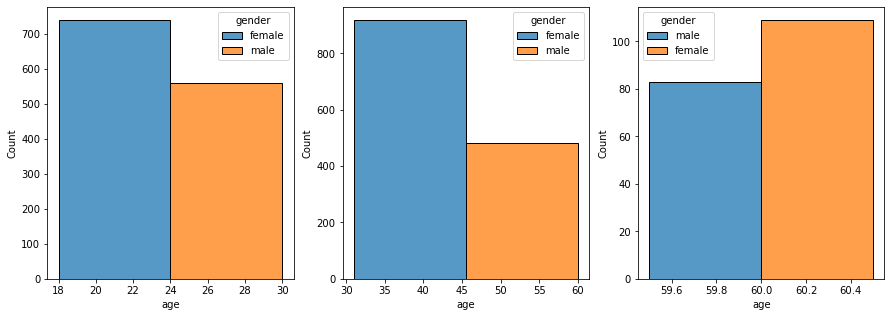

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df[df['age'] <= 30], x="age", hue="gender", multiple="dodge", ax=axes[0], bins=1)
sns.histplot(data=df[(df['age'] > 30) & (df['age'] <= 60)], x="age", hue="gender", multiple="dodge", ax=axes[1], bins=1)
sns.histplot(data=df[df['age'] >= 60], x="age", hue="gender", multiple="dodge", ax=axes[2], bins=1)
plt.show()

In [8]:
def get_img(img_dir, img_id, class_id):
    img = np.array(Image.open(os.path.join(img_dir, img_id, class_id + ".jpg")))
    return img

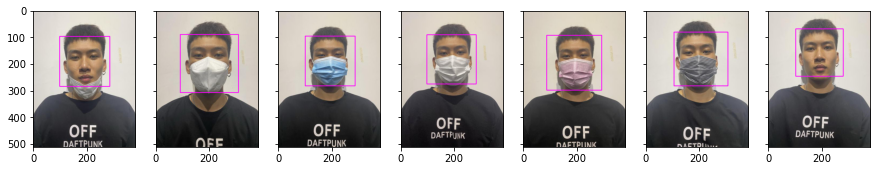

In [85]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# USING -- haarcascade_frontalface_default.xml
#500, 512, 123, 27
imgs = []
mask_img = []
bboxes = []
fig, axes = plt.subplots(1, 7, sharex=True, sharey=True, figsize=(15, 5))
img_id = df.iloc[2400].path
for class_id in num2class:
    img = get_img(cfg.img_dir, img_id, class_id)
    bbox = face_cascade.detectMultiScale(img)
    if len(bbox) != 0:
        bboxes.append([bbox.max(axis=0)])
        mask_img.append(img)
    else:
        print(f'{class_id} not found face')
        
    imgs.append(img)
imgs = np.array(imgs)


for i in range(len(bboxes)):
    for (x, y, w, h) in bboxes[i]:
        cv2.rectangle(mask_img[i], (x, y, w, h), (255, 0, 255), 2)
        axes[i].imshow(mask_img[i])
plt.show()

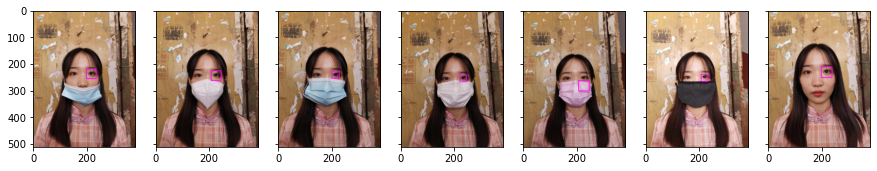

In [84]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# USING -- haarcascade_frontalface_default.xml
#500, 512, 123, 27
imgs = []
mask_img = []
bboxes = []
fig, axes = plt.subplots(1, 7, sharex=True, sharey=True, figsize=(15, 5))
img_id = df.iloc[500].path
for class_id in num2class:
    img = get_img(cfg.img_dir, img_id, class_id)
    bbox = eye_cascade.detectMultiScale(img)
    if len(bbox) != 0:
        bboxes.append([bbox.max(axis=0)])
        mask_img.append(img)
    else:
        print(f'{class_id} not found face')
        
    imgs.append(img)
imgs = np.array(imgs)


for i in range(len(bboxes)):
    for (x, y, w, h) in bboxes[i]:
        cv2.rectangle(mask_img[i], (x, y, w, h), (255, 0, 255), 2)
        axes[i].imshow(mask_img[i])
plt.show()